# Setup

In [4]:
import numpy as np
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing  import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
from sklearn.mixture import GaussianMixture as GMM

In [5]:
df = pd.read_csv(r'D:\DATA\ECommerce_consumer behaviour.csv')

# General Data

In [6]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [8]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


# Data Cleaning

In [9]:
df.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [10]:
df.fillna(0, inplace=True)

In [11]:
df['department_id'].nunique()

21

In [12]:
df['product_id'].nunique()

134

In [13]:
df['user_id'].nunique()

105273

In [14]:
# CONVERTING DATA TYPES
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


In [16]:
#Investigating all elements within each feature
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 31
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

In [17]:
# OUTLIER customers based on add_to_cart_order

# group the data by user_id and calculate the mean value for each user
df_mean = df.groupby('user_id').mean()

# calculate the IQR for the addtocart_order feature
Q1 = df_mean['add_to_cart_order'].quantile(0.25)
Q3 = df_mean['add_to_cart_order'].quantile(0.75)
IQR = Q3 - Q1

# find the outlier threshold
outlier_threshold = Q3 + 1.5 * IQR

# find the outlier customers
outlier_customers = df_mean[df_mean['add_to_cart_order'] > outlier_threshold]
#outlier_customers = outlier_customers.reset_index()
outlier_customers

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
user_id,,,,,,,,,
10,8.339500e+04,4.000000,3.000000,15.000000,14.00000,60.000000,15.500000,0.433333,10.400000
133,2.415920e+05,11.000000,3.000000,13.000000,5.00000,68.133333,15.500000,0.400000,9.033333
197,2.357070e+05,7.000000,6.000000,14.000000,6.00000,74.206897,15.000000,0.793103,11.551724
216,1.500908e+06,5.000000,5.000000,15.000000,24.00000,68.448276,15.000000,0.172414,13.655172
264,3.022479e+06,29.000000,2.000000,9.000000,9.00000,79.551724,15.000000,0.827586,11.103448
...,...,...,...,...,...,...,...,...,...
205789,3.418993e+06,13.000000,6.000000,12.000000,7.00000,63.900000,15.500000,0.600000,9.466667
205926,2.385091e+06,11.000000,1.000000,15.000000,6.00000,73.828571,18.000000,0.514286,10.171429
205956,4.562900e+05,3.000000,3.000000,14.000000,30.00000,69.151515,17.000000,0.303030,10.909091


In [18]:
# OUTLIER customers in the purchases made by each customer

# Group the data by user_id
grouped_data = df.groupby("user_id")["order_number"].agg(["mean", "std"])

# Calculate the lower and upper bounds for outliers
lower_bound = grouped_data["mean"] - 3 * grouped_data["std"]
lower_bound.name = 'order_number_lower'
upper_bound = grouped_data["mean"] + 3 * grouped_data["std"]
upper_bound.name = 'order_number_upper'

# join the lower and upper bounds to the original dataframe on user_id
df = df.join(lower_bound, on='user_id')
df = df.join(upper_bound, on='user_id')

# Identify the outliers
outliers = df[(df["order_number"] < df['order_number_lower']) | (df["order_number"] > df['order_number_upper'])]


outliers

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper
2538,677735,175561,2,3,12,16,32,1,0,4,produce,packaged produce,7.467505,52.722971
8764,2018358,185514,22,4,17,17,128,1,0,3,bakery,tortillas flat bread,-5.770319,18.847242
8765,2018358,185514,22,4,17,17,54,2,1,17,household,paper goods,-5.770319,18.847242
15536,2545752,185279,9,5,9,12,84,1,0,16,dairy eggs,milk,10.001293,28.306399
16290,1365995,136421,1,3,10,0,88,1,0,13,pantry,spreads,1.544766,74.812377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010592,1097536,97028,5,0,16,7,24,1,1,4,produce,fresh fruits,-0.146102,4.574673
2010593,1097536,97028,5,0,16,7,24,2,0,4,produce,fresh fruits,-0.146102,4.574673
2015806,1581072,93695,5,4,17,30,97,1,0,13,pantry,baking supplies decor,3.364384,4.740879
2016905,1373400,139870,11,2,12,30,116,1,0,1,frozen,frozen produce,-2.906531,10.137300


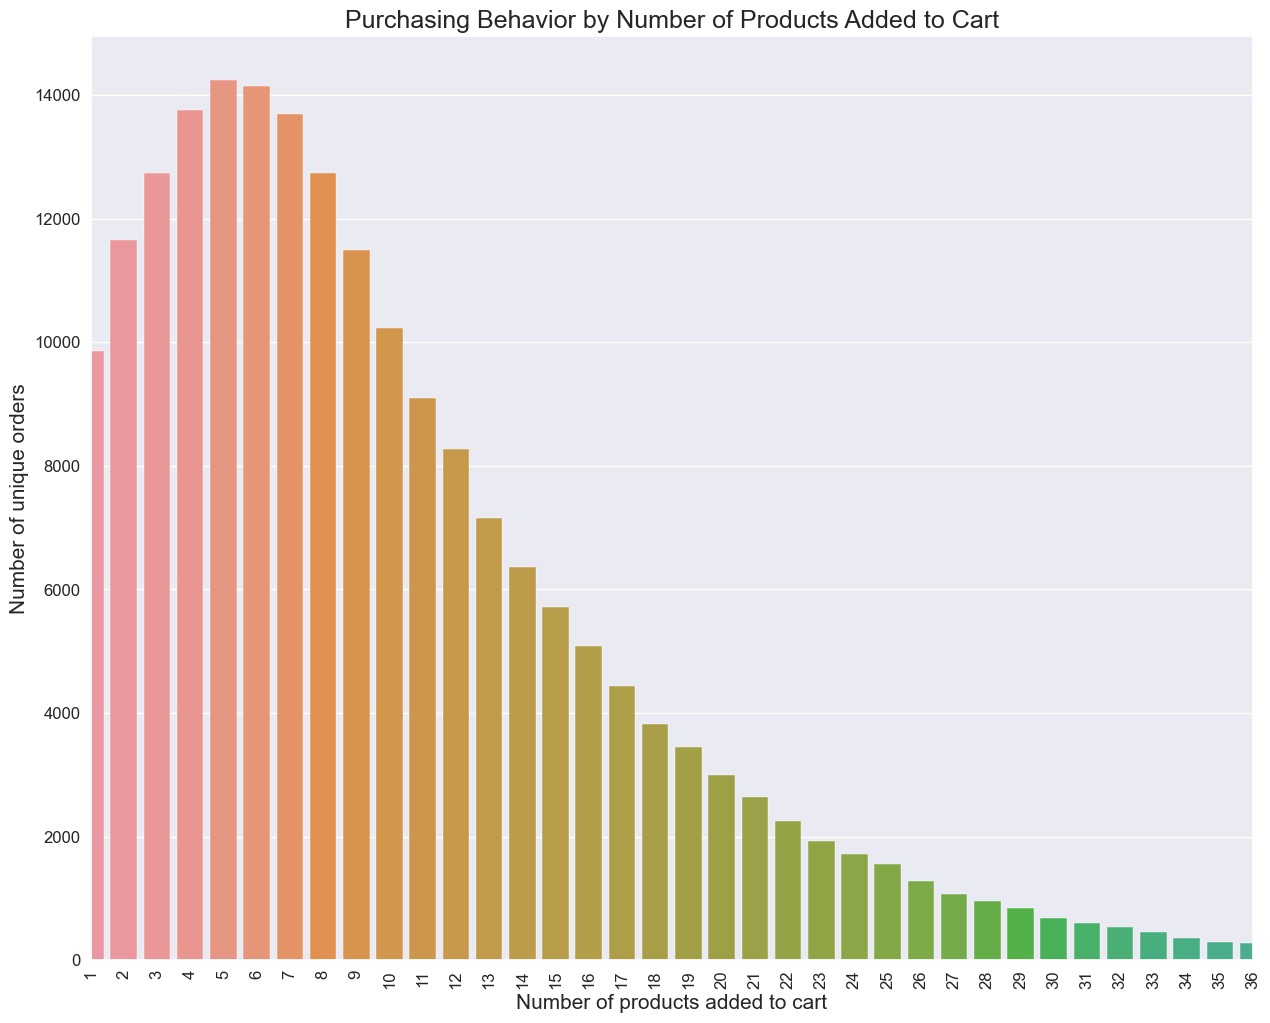

In [19]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
sns.set_palette("rocket_r")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
ax.grid(True, axis='y')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of unique orders', fontsize=15)
plt.xlabel('Number of products added to cart', fontsize=15)
plt.title('Purchasing Behavior by Number of Products Added to Cart', fontsize=18)
plt.xlim(0, 35)  # limit the X axis values to 35
plt.show()

# EDA

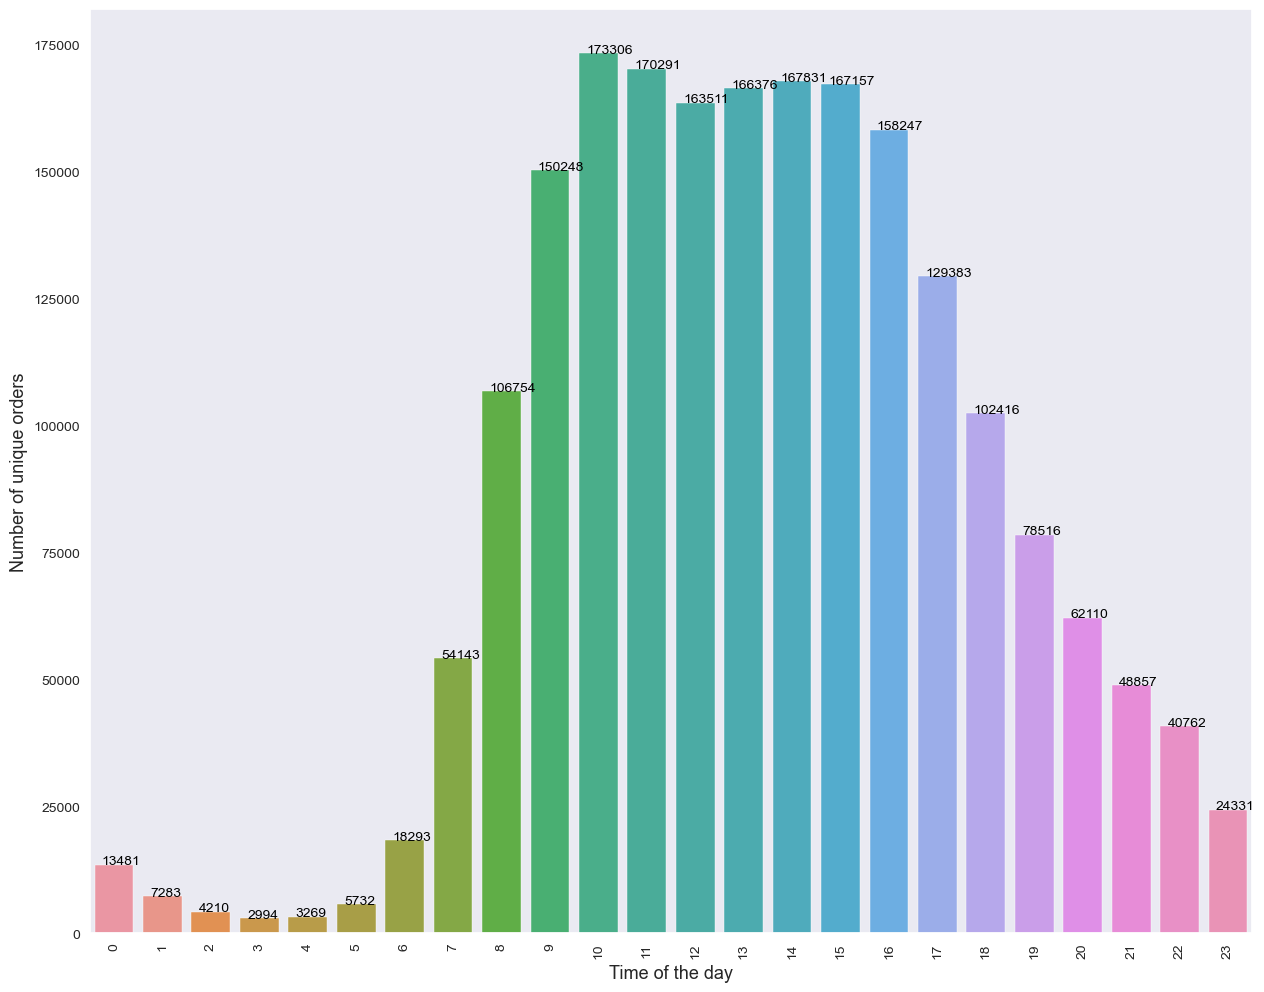

In [20]:
#What time of day is busiest?
grouped = df.groupby('order_hour_of_day', as_index=True).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)


f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x = grouped.index, y = grouped.user_id)
sns.color_palette("rocket_r", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Time of the day', fontsize=13)

for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

plt.show()

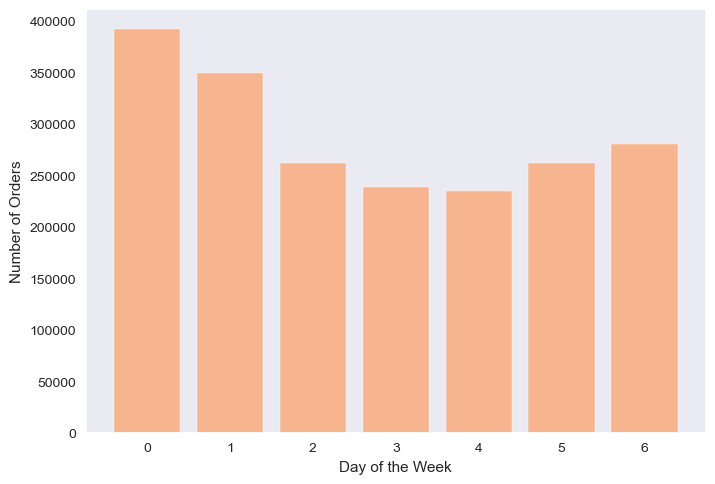

In [21]:
# distribution of orders by day of the week

order_dow_counts = df.groupby('order_dow').size()

plt.bar(order_dow_counts.index, order_dow_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

C:\Users\M\AppData\Local\Temp\ipykernel_15720\625219819.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['days_since_prior_order'], shade=True)


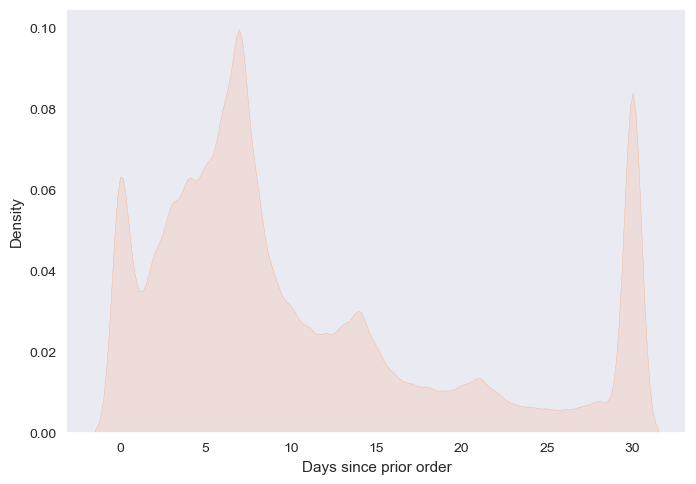

In [22]:
# distribution of days since prior order

sns.kdeplot(df['days_since_prior_order'], shade=True)
plt.xlabel('Days since prior order')
plt.show()

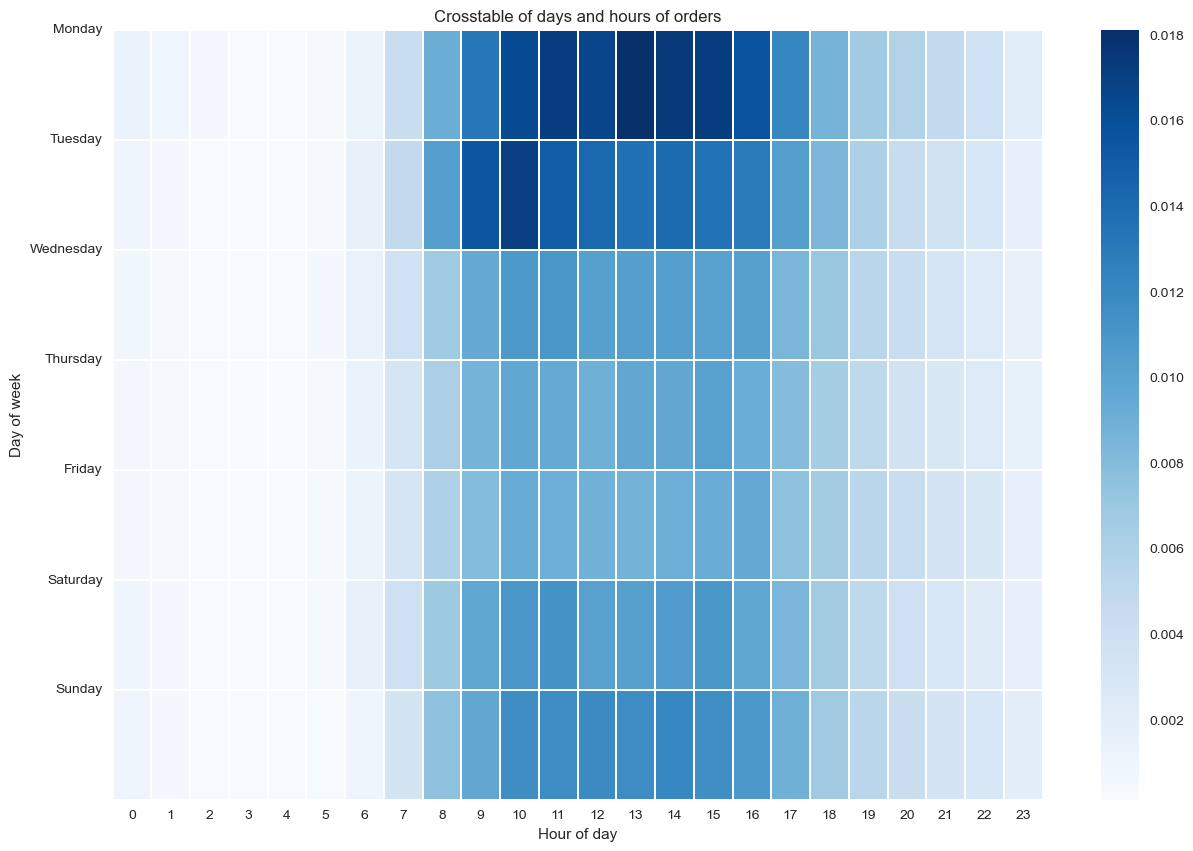

In [23]:
#Heatmap Study
day_hour_df = df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
day_hour_df_piv = day_hour_df.pivot('order_dow', 'order_hour_of_day', 'order_number')/df.shape[0]

plt.figure(figsize=(15,10))
sns.heatmap(day_hour_df_piv,linewidths=0.25, cmap='Blues')
plt.yticks([0,1, 2, 3, 4, 5, 6],["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Hour of day")
plt.yticks(rotation=0)
plt.ylabel("Day of week")


plt.title("Crosstable of days and hours of orders");

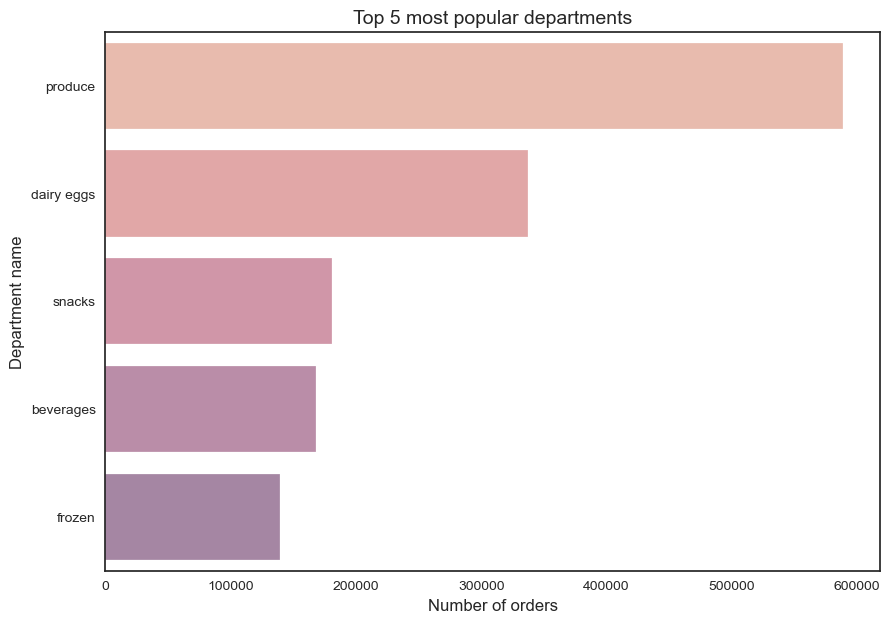

In [24]:
#What are the most popular departments?
departments = df['department'].value_counts()

departments_df = pd.DataFrame(departments).reset_index()

departments_df.columns = ['Department', 'Order Count']

top_departments = departments_df.sort_values(by='Order Count', ascending=False).head()

plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.barplot(data=top_departments, x="Order Count", y="Department", palette = 'flare', alpha=0.6)
plt.title("Top 5 most popular departments", fontsize=14)
plt.xlabel("Number of orders", fontsize=12)
plt.ylabel("Department name", fontsize=12)
plt.show()

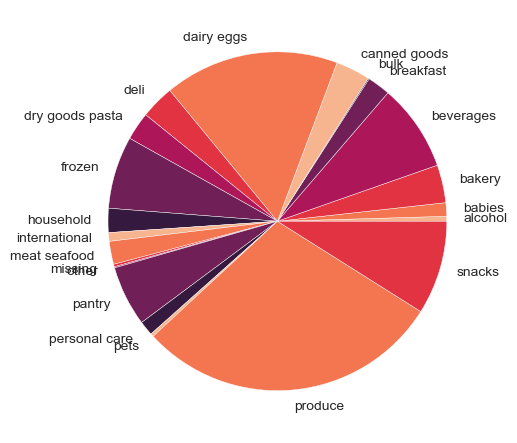

In [25]:
# distribution of orders by department

department_counts = df.groupby('department').size()
plt.pie(department_counts.values, labels=department_counts.index)
plt.show()

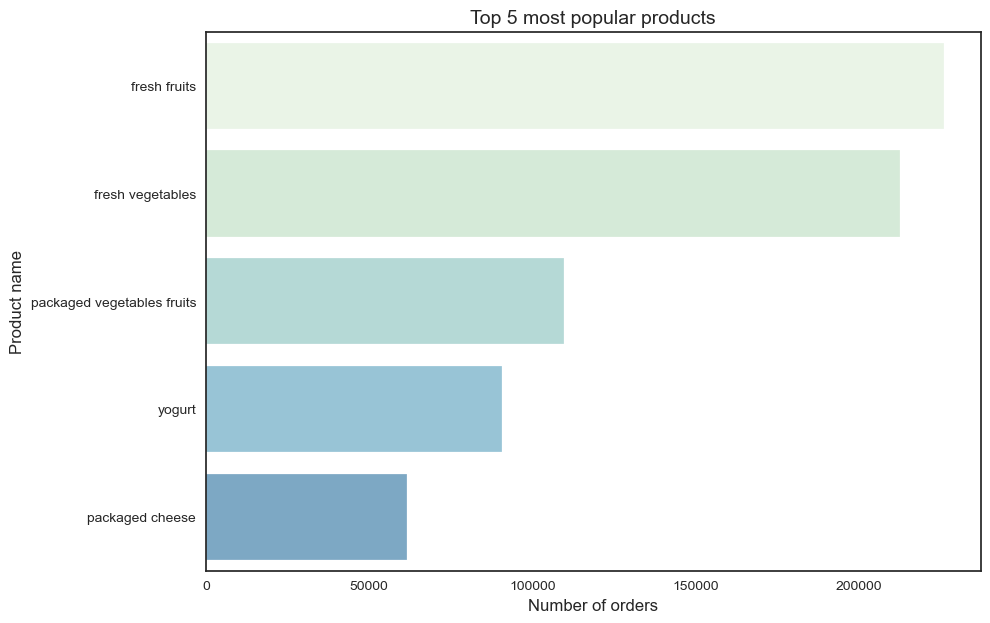

In [26]:
#What are the most popular products?
products = df['product_name'].value_counts()
products_df = pd.DataFrame(products).reset_index()
products_df.columns = ['Product', 'Order Count']
top_products = products_df.sort_values(by='Order Count', ascending=False).head()

plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.barplot(data=top_products, x="Order Count", y="Product", palette = 'GnBu', alpha=0.6)
plt.title("Top 5 most popular products", fontsize=14)
plt.xlabel("Number of orders", fontsize=12)
plt.ylabel("Product name", fontsize=12)
plt.show()


In [27]:
# Crosstab to check distribution of products in each department
product_dept_df = pd.crosstab(df['department'], df['product_name'])
product_dept_df.head()

#What is the most popular product in each category?
product_dept_df.idxmax(axis=1).to_frame(name="Most popular Item")

,Most popular Item
department,
alcohol,beers coolers
babies,baby food formula
bakery,bread
beverages,water seltzer sparkling water
breakfast,cereal
bulk,bulk grains rice dried goods
canned goods,soup broth bouillon
dairy eggs,yogurt
deli,lunch meat


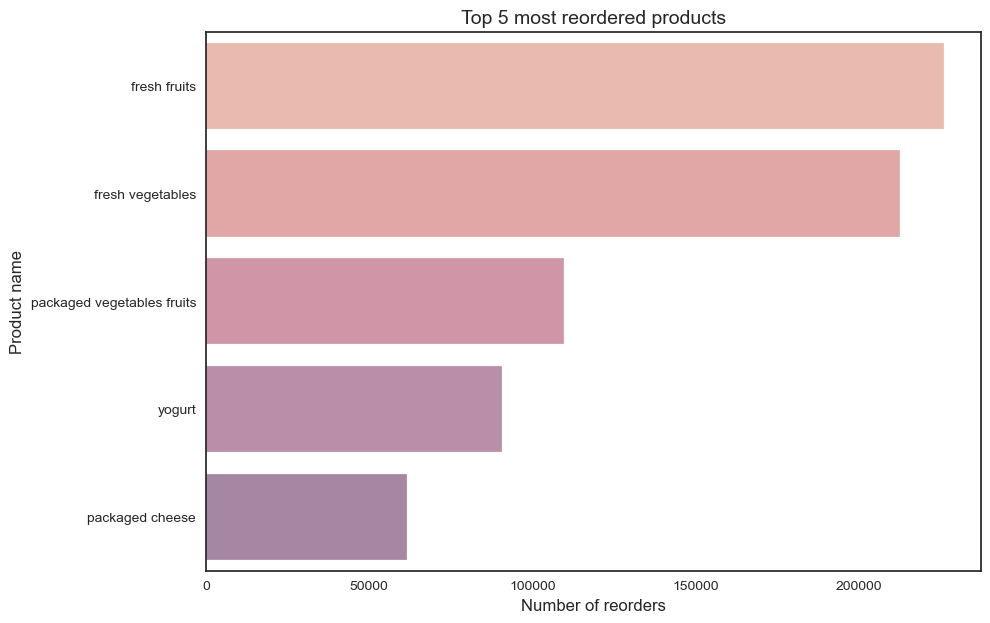

In [28]:
#Which products are reordered most?
product_reordered_df = df.groupby('product_name')['reordered'].count().reset_index().sort_values(by='reordered', ascending=False)
product_reordered_df

plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.barplot(data=product_reordered_df.head(5), x="reordered", y="product_name", palette = 'flare', alpha=0.6)
plt.title("Top 5 most reordered products", fontsize=14)
plt.xlabel("Number of reorders", fontsize=12)
plt.ylabel("Product name", fontsize=12)
plt.show()

<Axes: >

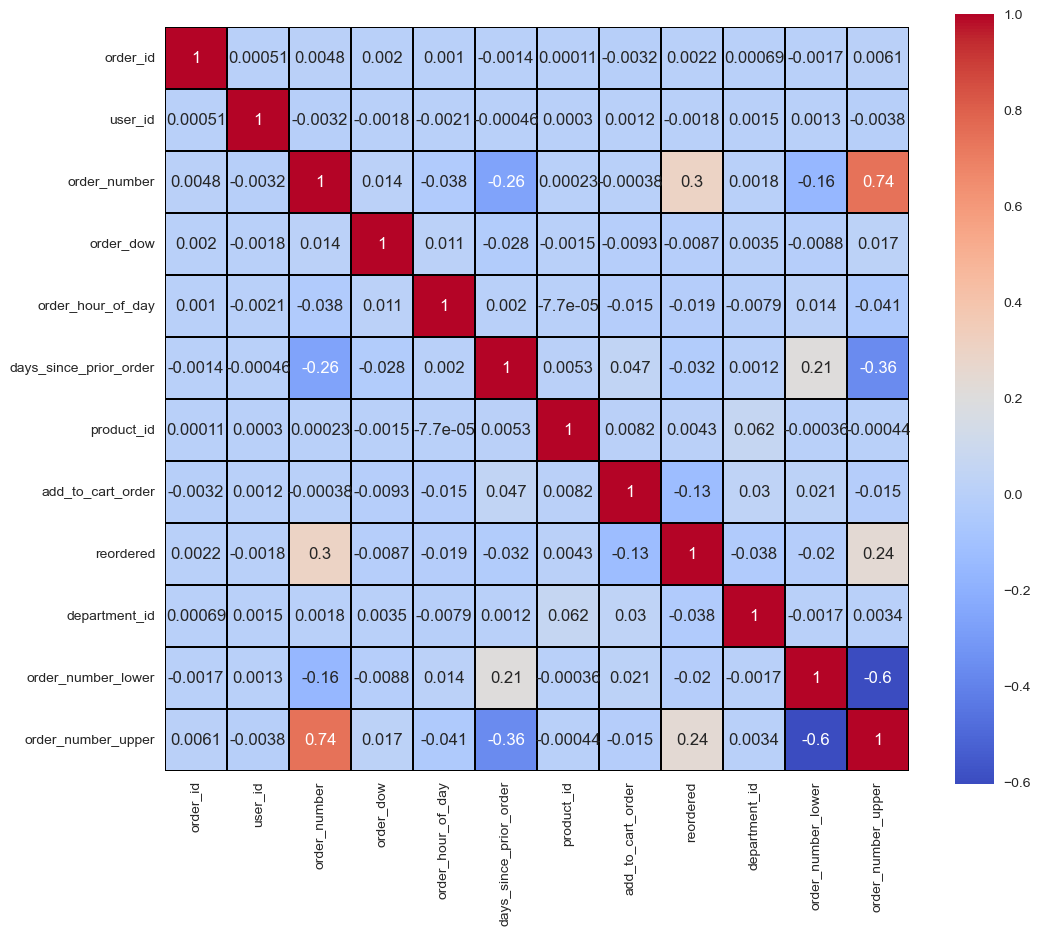

In [29]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="coolwarm", linecolor='black', annot=True)

# Use K-means clustering to identify the optimal number of clusters. Experiment with different values of K and use metrics such as the elbow method and silhouette score to evaluate the performance of the clustering.

In [30]:
df.drop(['department', 'product_name'],inplace = True, axis=1)
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [31]:
#scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.iloc[:, :-1])

C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 19959512.926450565


C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 18539060.499683894


C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 17497014.460807305


C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 16731755.228969637


C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 16033583.593356116


C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 15638389.700811526


C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 15149131.776134916


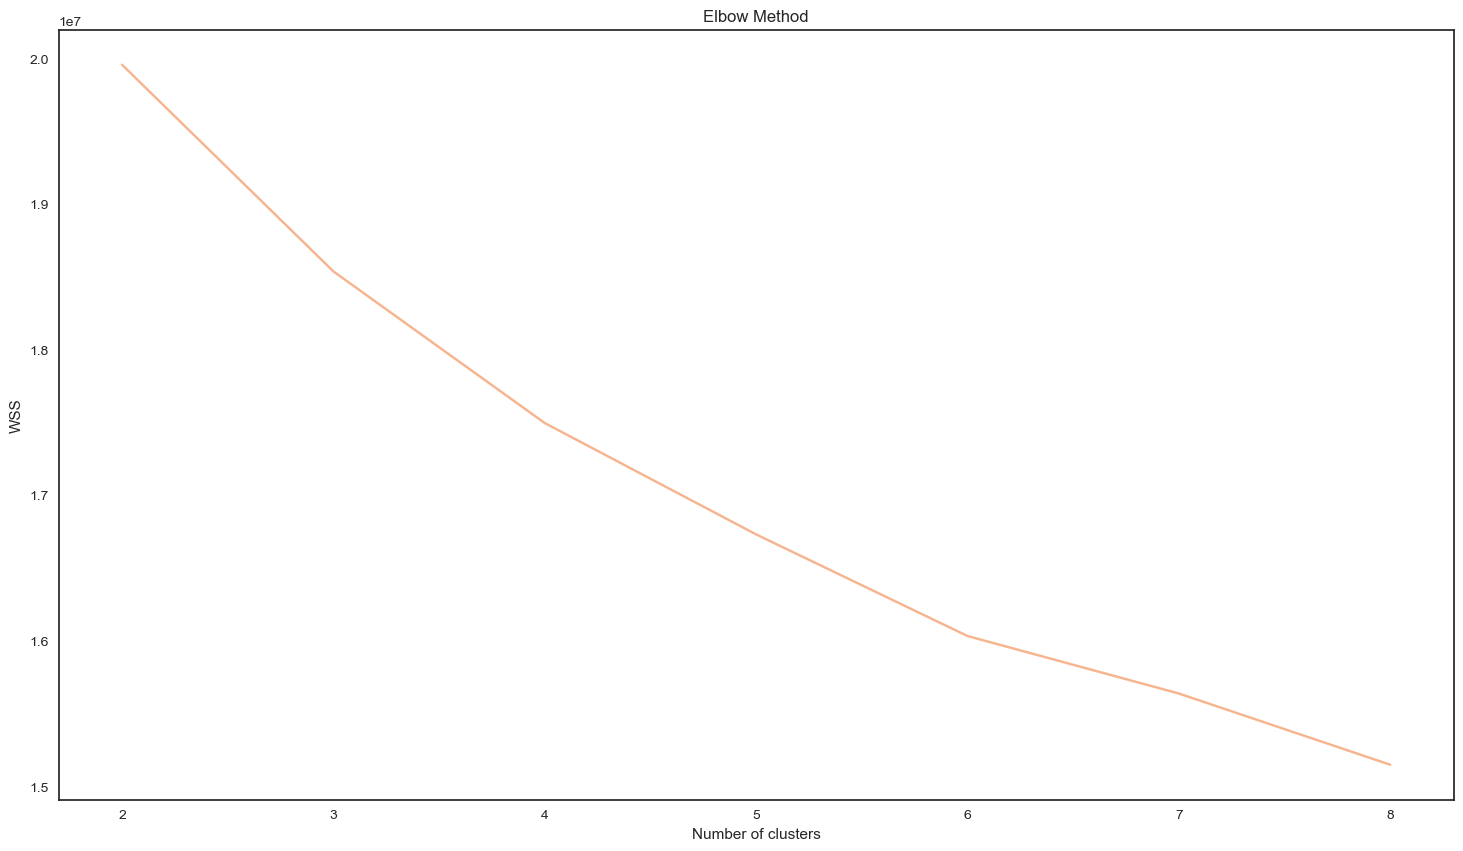

In [32]:
wcss = []

plt.figure(figsize=(18,10))
for i in range(2, 9):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(data_scaled)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(2, 9), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS') 
plt.show()

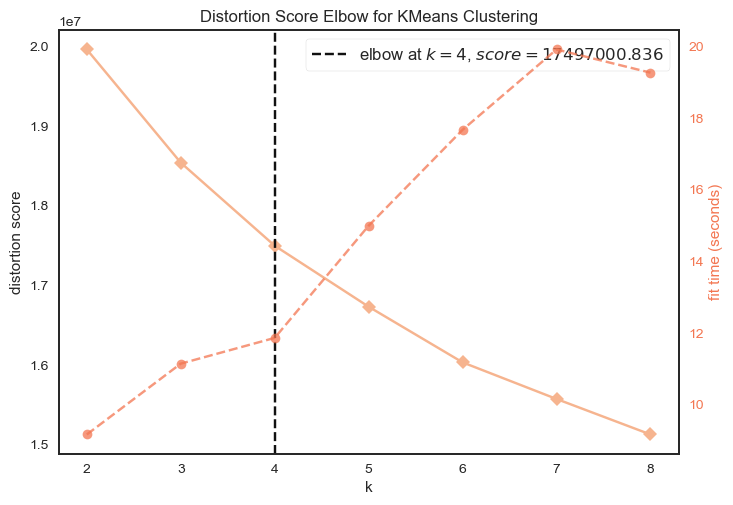

In [33]:
#check for number of optimal clusters

model = KMeans(n_init=10)
visualiser = KElbowVisualizer(model, k=(2,9))
visualiser.fit(data_scaled)       
visualiser.show();

In [ ]:
# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

In [180]:
#fit the model with 4 clusters

kmeans_mod = KMeans(n_clusters=4, n_init='auto')
kmeans_mod.fit(data_scaled)

KMeans(n_clusters=4, n_init='auto')

In [181]:
df['cluster'] = kmeans_mod.labels_
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,order_number_lower,order_number_upper,cluster
0,2425083,49125,1,2,18,0,17,1,0,13,-31.921436,69.180695,1
1,2425083,49125,1,2,18,0,91,2,0,16,-31.921436,69.180695,0
2,2425083,49125,1,2,18,0,36,3,0,16,-31.921436,69.180695,1
3,2425083,49125,1,2,18,0,83,4,0,4,-31.921436,69.180695,2
4,2425083,49125,1,2,18,0,83,5,0,4,-31.921436,69.180695,2


In [182]:
df['cluster'].value_counts()

0    632628
1    588480
2    506908
3    291485
Name: cluster, dtype: int64

# Visualize the clusters and analyze their characteristics. This may involve plotting the clusters in 2D or 3D using PCA or t-SNE.

In [183]:
df.drop(['cluster'],inplace = True, axis=1)

In [184]:
df.shape

(2019501, 12)

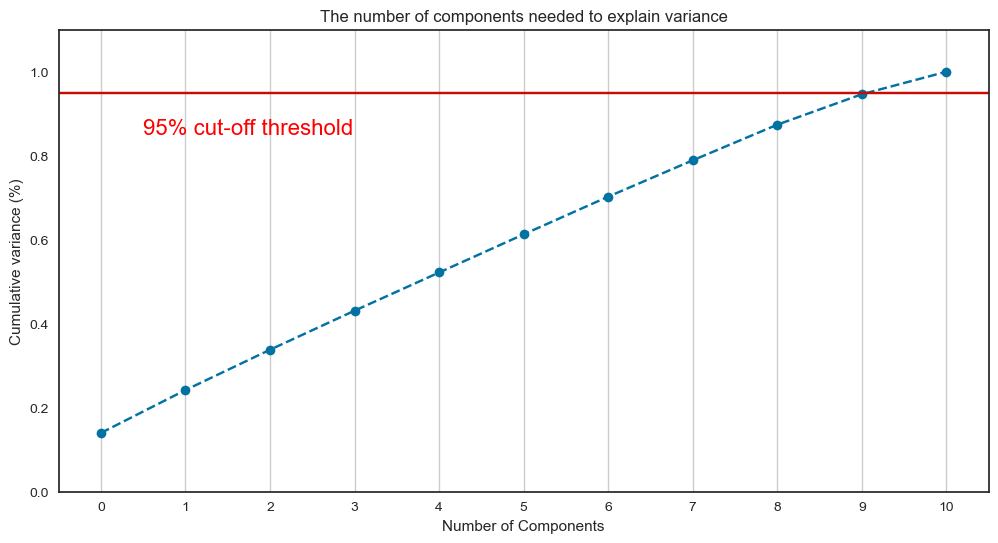

In [185]:
pca = PCA().fit(data_scaled)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [186]:
pca = PCA(n_components =9,random_state = 1).fit(data_scaled)
X_pca = pca.transform(data_scaled)

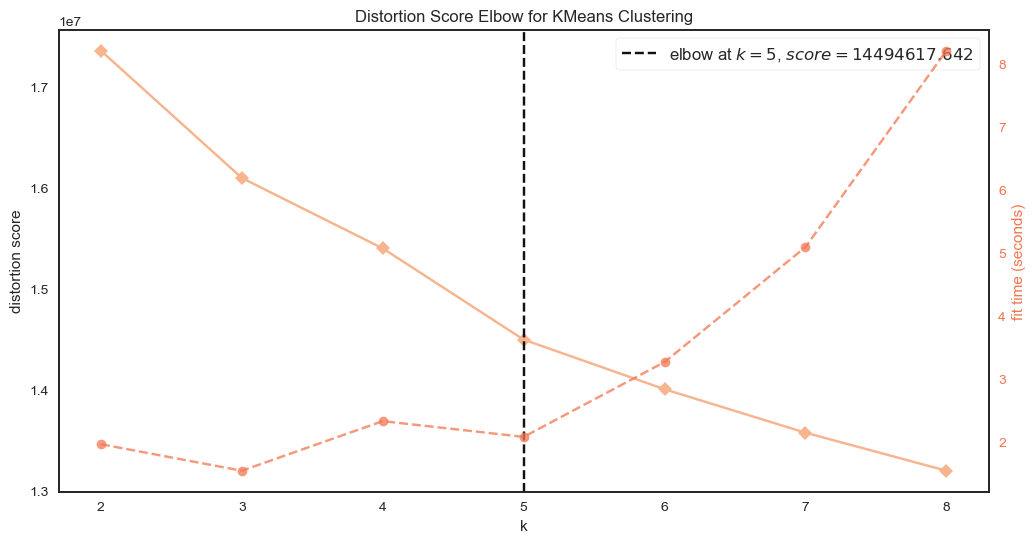

In [187]:
model = KMeans(n_init='auto')
visualiser = KElbowVisualizer(model, k=(2,9))
visualiser.fit(X_pca)       
visualiser.show();

C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


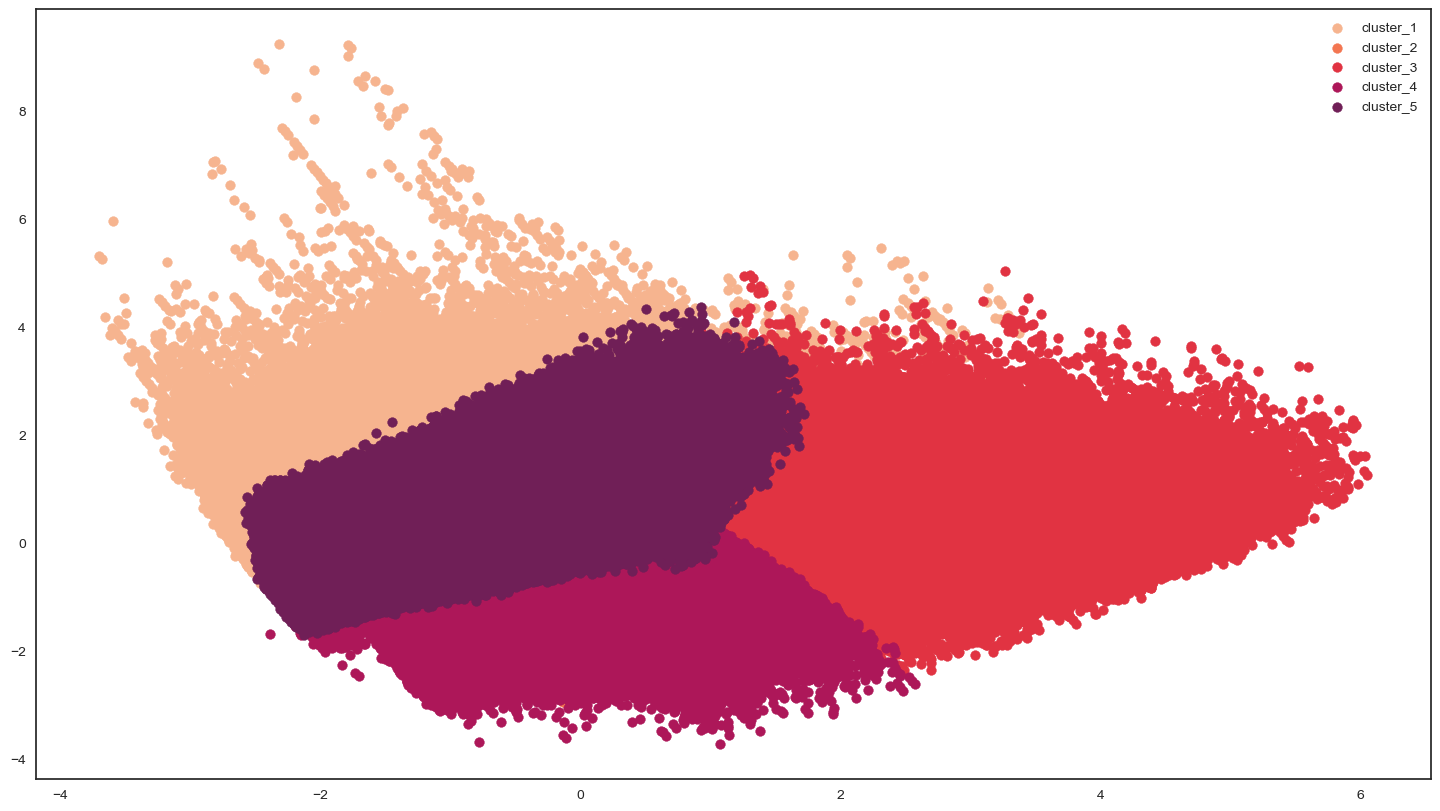

In [188]:
candi = ['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5','cluster_6','cluster_7',
         'cluster_8','cluster_9','cluster_10','cluster_11']
plt.figure(figsize=(18,10))
model = KMeans(n_clusters=5)
model.fit(X_pca)
yhat = model.predict(X_pca)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
    plt.legend(candi,loc='upper right')

plt.show()

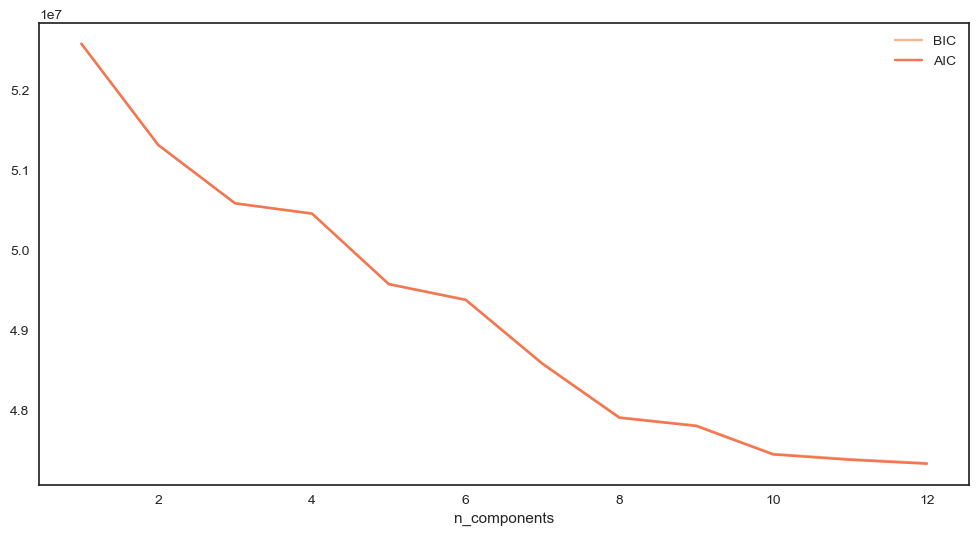

In [189]:
n_components = np.arange(1, 13)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

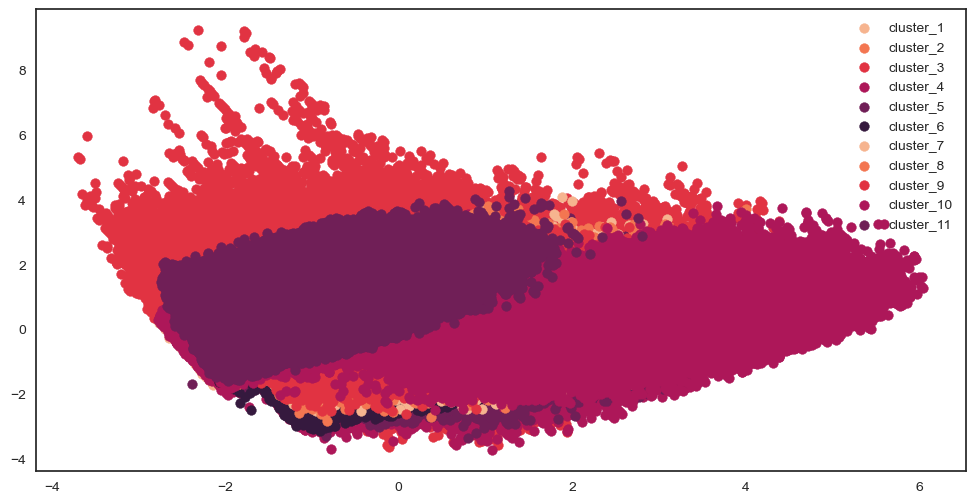

In [190]:
model = GMM(n_components = 11)
yhat=model.fit_predict(X_pca)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
    plt.legend(candi,loc='upper right')

plt.show()

In [191]:
pca = PCA(n_components =3,random_state = 1).fit(data_scaled)
X_pca = pca.transform(data_scaled)

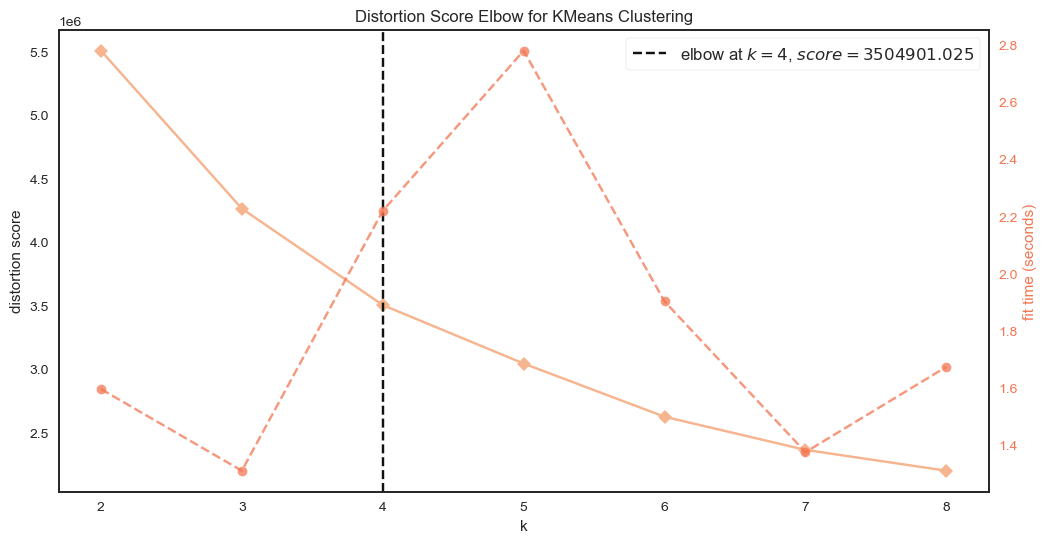

In [192]:
model = KMeans(n_init='auto')
visualiser = KElbowVisualizer(model, k=(2,9))
visualiser.fit(X_pca)       
visualiser.show();

C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


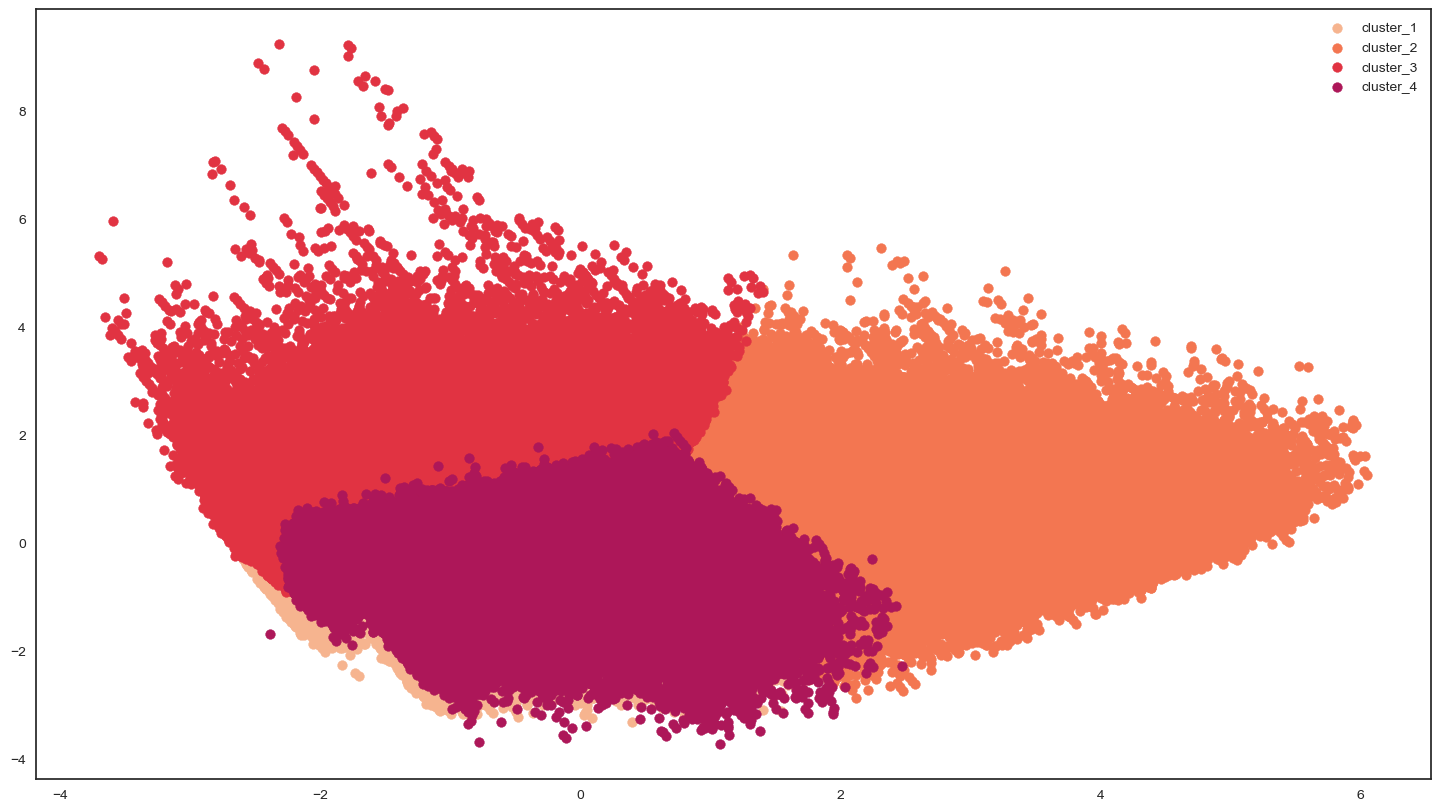

In [193]:
plt.figure(figsize=(18,10))
model = KMeans(n_clusters=4)
model.fit(X_pca)
yhat = model.predict(X_pca)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
    plt.legend(candi,loc='upper right')

plt.show()

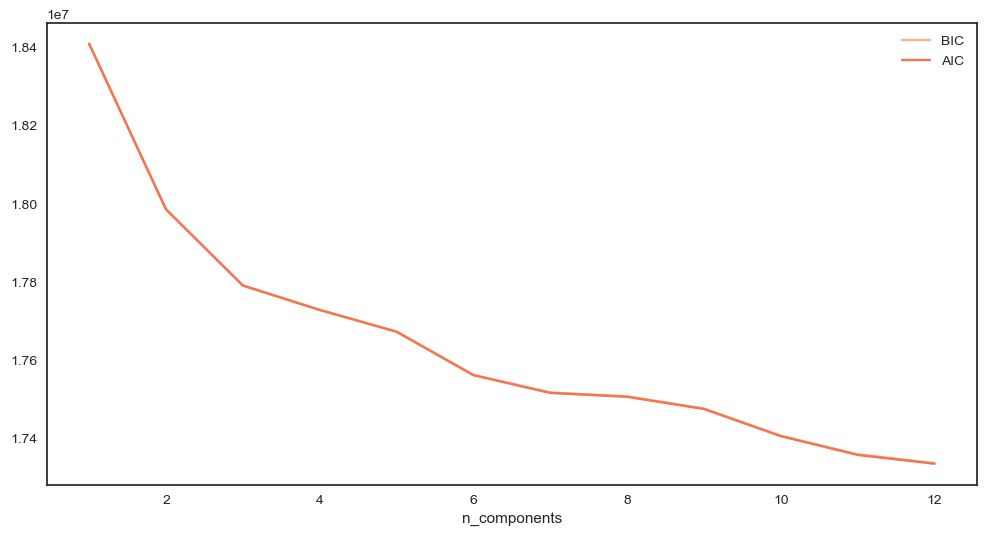

In [194]:
n_components = np.arange(1, 13)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

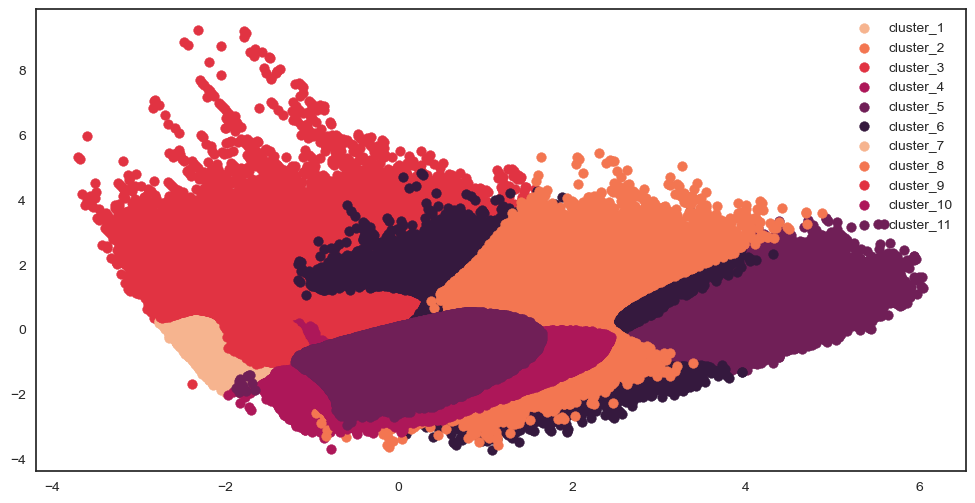

In [195]:
model = GMM(n_components = 11)
yhat=model.fit_predict(X_pca)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
    plt.legend(candi,loc='upper right')

plt.show()

In [196]:
pca = PCA(n_components =2,random_state = 1).fit(data_scaled)
X_pca = pca.transform(data_scaled)

In [206]:
X_pca

,0,1
0,0.343450,1.126493
1,0.287603,1.756909
2,0.275513,1.544138
3,0.312888,1.112657
4,0.289624,1.180585
...,...,...
2019496,-0.055555,0.713197
2019497,2.337158,-0.069796
2019498,2.348304,-0.610288
2019499,2.325040,-0.542360


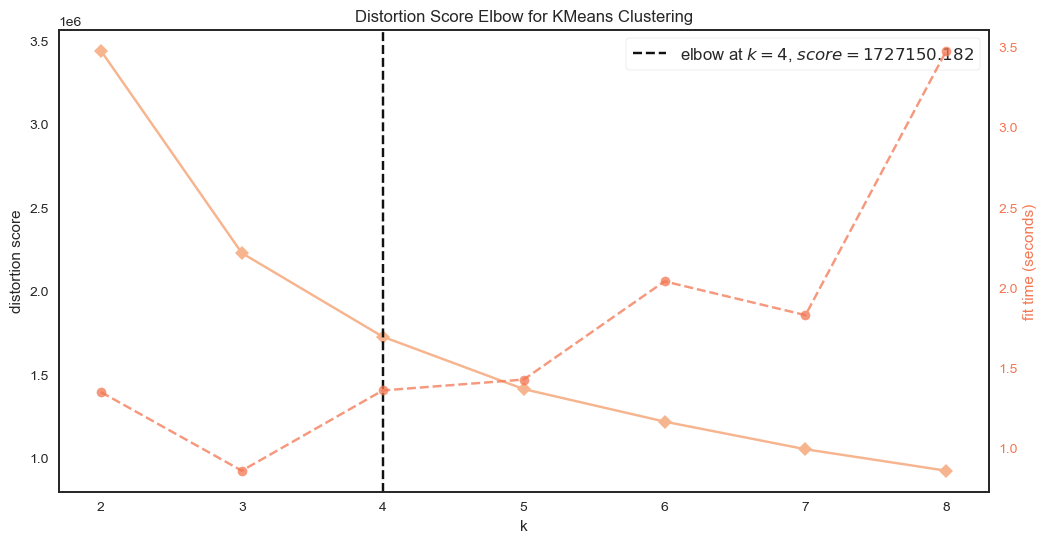

In [197]:
model = KMeans(n_init='auto')
visualiser = KElbowVisualizer(model, k=(2,9))
visualiser.fit(X_pca)       
visualiser.show();

C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


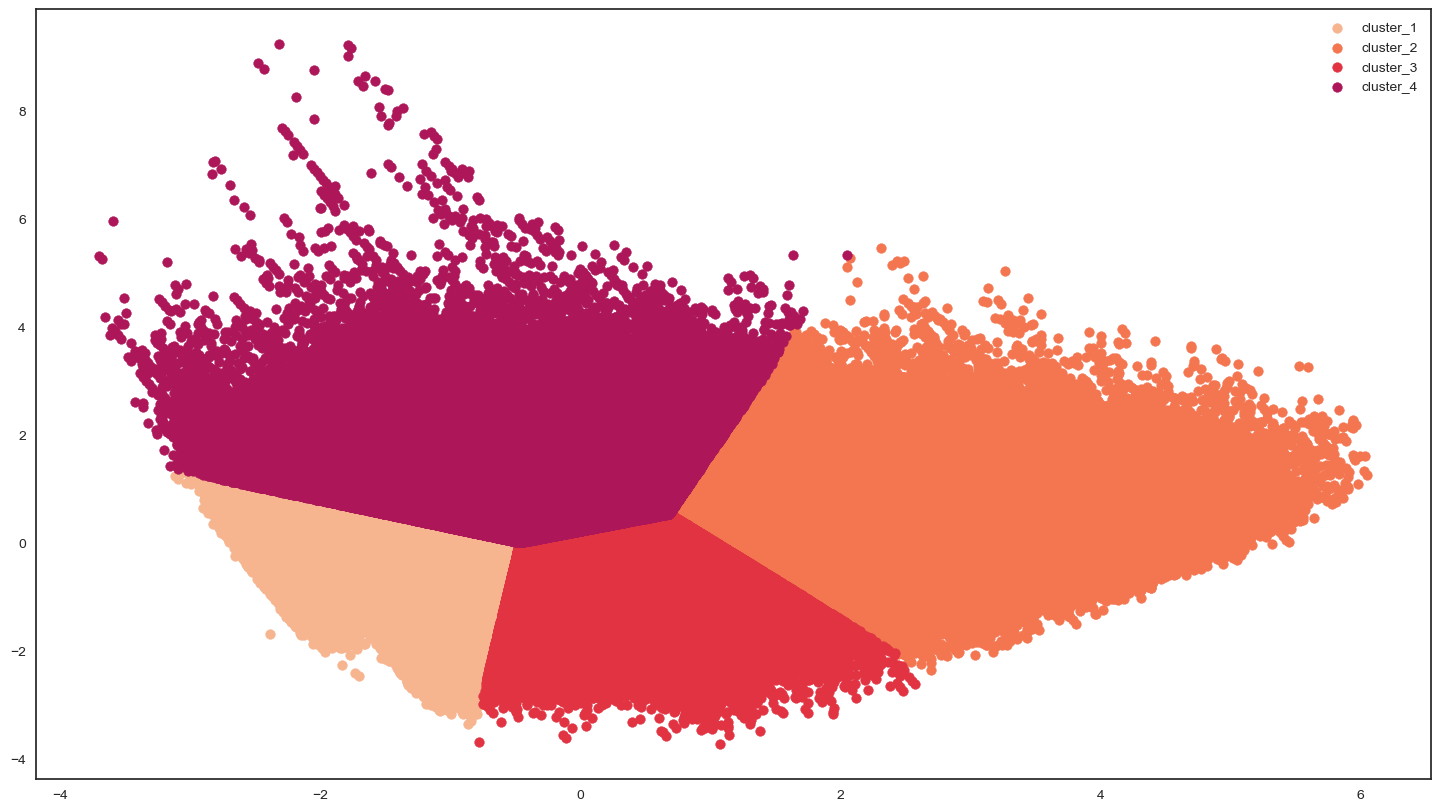

In [198]:
plt.figure(figsize=(18,10))
model = KMeans(n_clusters=4)
model.fit(X_pca)
yhat = model.predict(X_pca)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
    plt.legend(candi,loc='upper right')

plt.show()

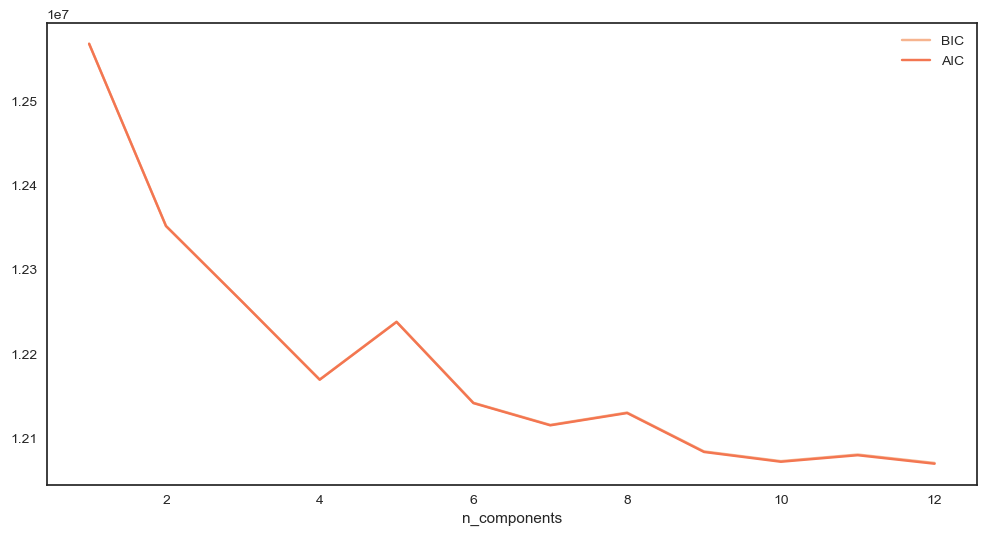

In [199]:
n_components = np.arange(1, 13)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

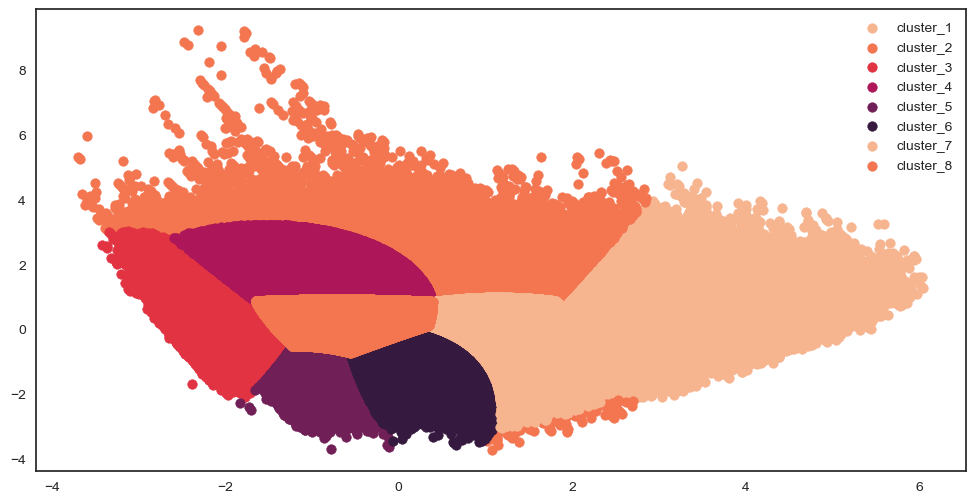

In [201]:
model = GMM(n_components = 8)
yhat=model.fit_predict(X_pca)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
    plt.legend(candi,loc='upper right')

plt.show()

# Experiment with other clustering algorithms such as DBSCAN or hierarchical clustering, and compare their performance with K-means.

In [202]:
X_pca = pd.DataFrame(data=X_pca)

In [203]:
# Define the percentage of samples you want to select
subset_percentage = 0.01  # Select 1% of the samples

# Calculate the subset size based on the percentage
subset_size = int(subset_percentage * len(X_pca))

# Randomly select a subset of samples
subset_indices = random.sample(range(len(X_pca)), subset_size)
subset = df.iloc[subset_indices]

In [204]:
subset

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,order_number_lower,order_number_upper
1176011,684843,137997,1,3,11,0,88,3,0,13,1.000000,1.000000
850885,1972480,177110,17,0,8,4,123,12,0,4,-11.975064,49.689350
1950943,1215825,18247,5,6,7,28,91,17,0,16,5.000000,5.000000
1759951,1785775,66844,6,0,17,2,7,4,0,12,-22.586318,93.127302
1766271,124233,23415,38,1,15,6,67,15,1,20,-11.940596,54.709827
...,...,...,...,...,...,...,...,...,...,...,...,...
1697778,1464051,90480,19,0,11,8,83,1,1,4,6.868295,50.696923
1767014,2206769,34313,15,3,17,4,53,2,1,16,-2.183119,103.455846
1409766,1388374,80817,25,2,10,4,83,11,0,4,-23.074534,66.485248
1549292,2767357,109086,20,6,21,8,74,21,1,17,11.020483,27.570426


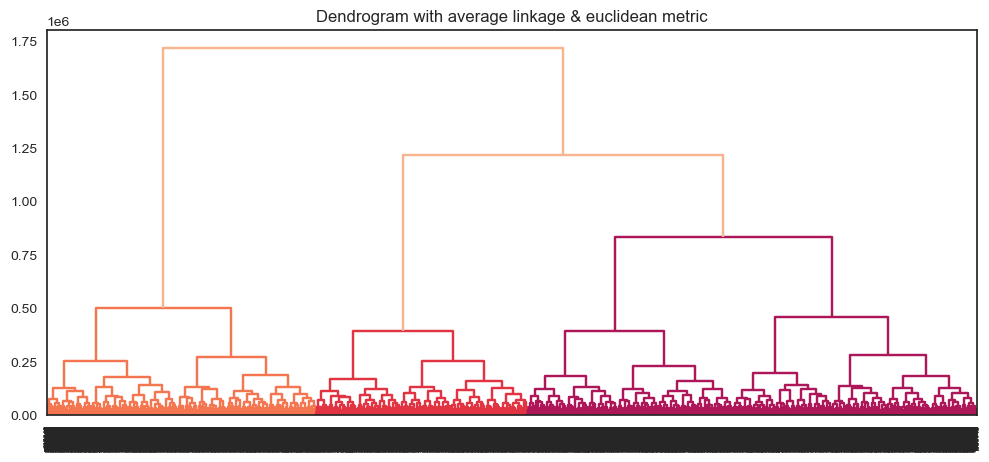

In [205]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with average linkage & euclidean metric")  
dend = shc.dendrogram(shc.linkage(subset, method='average', metric='euclidean'), labels=subset.index)

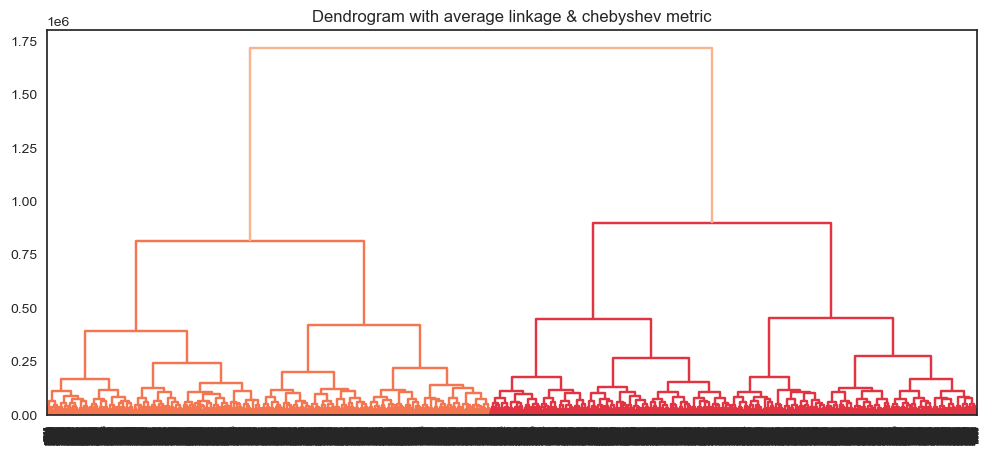

In [207]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with average linkage & chebyshev metric")  
dend = shc.dendrogram(shc.linkage(subset, method='average', metric='chebyshev'))

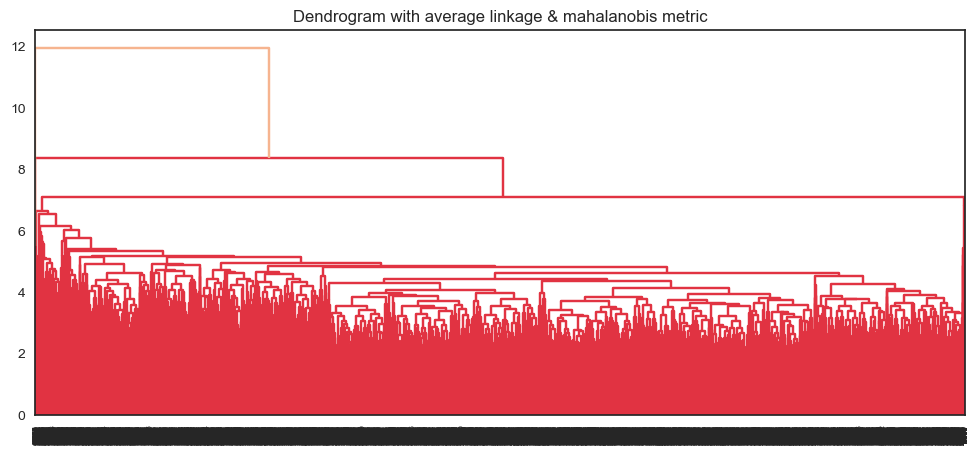

In [209]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with average linkage & mahalanobis metric")  
dend = shc.dendrogram(shc.linkage(subset, method='average', metric='mahalanobis'))

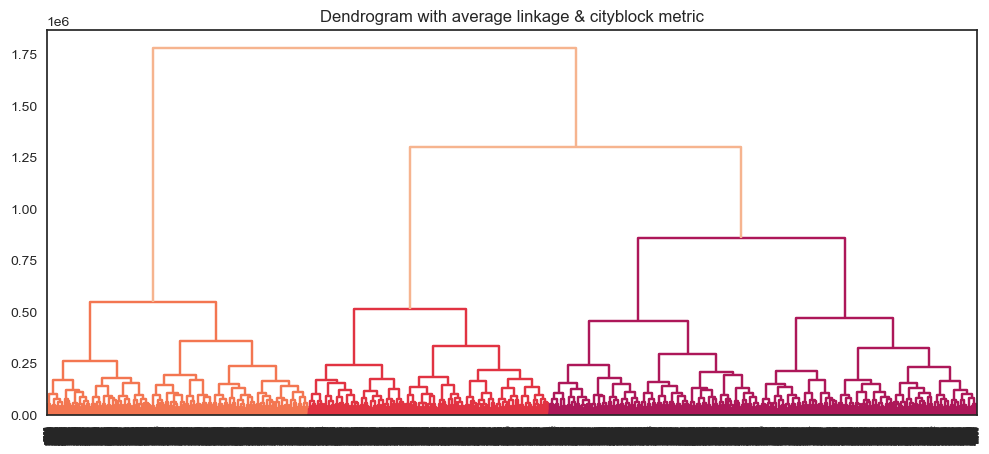

In [210]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with average linkage & cityblock metric")  
dend = shc.dendrogram(shc.linkage(subset, method='average', metric='cityblock'))